# Curve Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit   # This is new!

## Principles

Curve fitting is used to represent a set of data by a model function that has adjustable coefficients. The fit can 

* Smooth out experimental noise

* Allow rapid interpolation, extrapolation, differentiation, integration, and other mathematical operations

A curve can be 

* Empirical (i.e. not based on theory) such as a polynomial and where the coefficients do not have any physical significance

* Based on a physical model or theory where the coefficients are based on material properties, geometry, etc. 

* Some mix of the two

**Recall the procedure in Excel**
1. Use a trendline with a plot. Several model forms available: polynomial, linear, power law, logarithic, exponential.
1. If the form you want is not available, use Solver to minimize the sum square error by changing the model parameters.

**Python**
* Two methods:
    1. ```polyfit``` for polynomial fits (including linear)
    1. ```curve_fit``` for general curve fits

## I. Polynomial fits

* ```p = np.polyfit(x, y, polynomial_order)``` 
* ```np.polyval(p, x)```
* Set or obtain your given x and y data
* Get a polyfit object using ```polyfit```
* Evaluate the polynomial at desired locations using ```polyval```


### Exercise

* Given the data below,
* Fit a third order polynomial.
* Print out the polynomial coefficients.
* Plot the data and the polynomial curve 
    * Use more points for the curve than just the ```xg``` data.

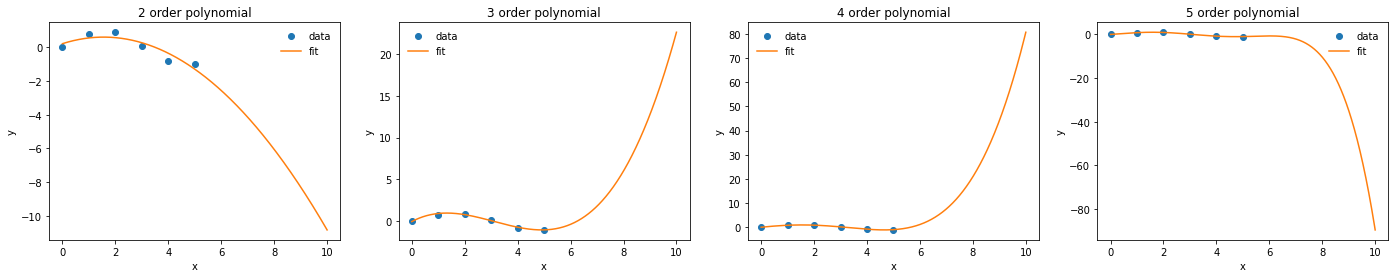

In [2]:
xg = np.array([0., 1., 2., 3., 4., 5.])         # given x data
yg = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])   # given y data

#-------------
def make_plots(n_a, n_b, x_a, x_b):
    n = n_b - n_a
    p = {"nan":0}
    xx = np.linspace(x_a,x_b,1000)
    yy = {"nan":0}
    for i in range(n_a, n_b):
        p[i] = np.polyfit(xg, yg, i)
        yy[i] = np.zeros(len(xx))
        yy[i] = np.polyval(p[i], xx)

    plt.figure(figsize=[6*n, 4])
    plt.rc('font', size=10)
    for i in range(n_a, n_b):
        plt.subplot(1, n, i-n_a+1)
        plt.title("{N} order polynomial".format(N=i))
        plt.plot(xg, yg, 'o')
        plt.plot(xx, yy[i], '-')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(['data', 'fit'], frameon=False);

make_plots(2, 6, 0, 10)

### Exercise

* Given the data below for $2\le x\le 8$
* Fit a 6th order polynomial to the data.
* Plot the results for $0\le x\le 12$.

/tmp/ipykernel_111/147583705.py:1: RankWarning: Polyfit may be poorly conditioned
  make_plots(6, 7, 0, 12)


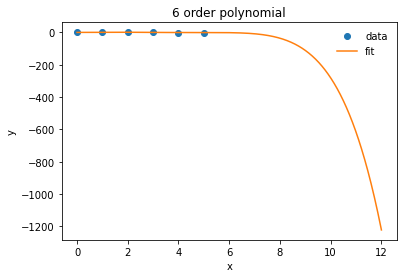

In [4]:
make_plots(6, 7, 0, 12)

What does this tell you about using the polynomial fit outside of the original range of the data?

**It doesn't do a very good job of extrapolating outside the sample range**

### II. General Curve Fits

We can fit a general function f(x; a, b, c) where f is a function of x with parameters a, b, c that we want to optimize for a set of given data.

Use ```curve_fit``` available from ```from scipy.optimize import curve_fit```
* ```params, extras = curve_fit(f, x_data, y_data)```

### Example from scipy.org

Fit the following function to the given data
$$f(x) = a\exp(-bx) + c$$
* Plot the data and the curve fit

a=5.2782, b=1.8839, c=0.5715

Pearson's R2 =  0.5825544799713368


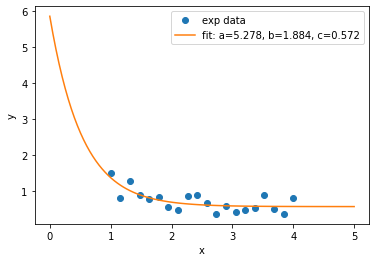

In [3]:
#-------- Set some given data (normally, this is already available)

x_data = np.linspace(1,4,20)
y_data = 2.5*np.exp(-1.3*x_data)+0.5 + 0.2*np.random.normal(size=len(x_data))

#-------- Define the function with parameters: x comes first

def f(x, a, b, c) :     
    return a*np.exp(-b*x) + c

#-------- Do the curve fit

abc, extras = curve_fit(f, x_data, y_data)

a = abc[0]
b = abc[1]
c = abc[2]

print(f"a={abc[0]:.4f}, b={abc[1]:.4f}, c={abc[2]:.4f}")

# get the Pearson's R2 value
y_fit = f(x_data, a, b, c)
Covar = np.corrcoef(y_data,y_fit)
print("\nPearson's R2 = ",Covar[0][1]**2)



#-------- Output / plot the results
x_fit = np.linspace(0,5,100)
y_fit = f(x_fit,a,b,c)


plt.plot(x_data, y_data, 'o', label='exp data')
plt.plot(x_fit, y_fit, '-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a,b,c))
plt.legend()
plt.xlabel('x') 
plt.ylabel('y');

#### Question
* What appears to be missing from this ```curve_fit``` function call?

#### Answer
* An initial guess for the parameters is not required, but it is possible to give this if desired. 
    * Use ```help(curve_fit)``` for details on this and other options.
* Also need to be able to change number of iterations. Use `maxfev=...`